In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
# from konlpy.tag import Mecab
import matplotlib.pyplot as plt

# torch
import torch
import torchvision.transforms as T

server = 'colab'

In [ ]:
if server == 'docker':
  data_path = '/root/share/tour_ai/data/train.csv'
elif server == 'colab':
  data_path = '/content/drive/MyDrive/commit_folder/competition/tour_ai/data/train.csv'
  mecab_data_path = '/content/drive/MyDrive/commit_folder/competition/tour_ai/data/mecab_data.csv'

In [ ]:
data = pd.read_csv(data_path)
mecab_data = pd.read_csv(mecab_data_path)

In [ ]:
# 이미지 불러오기
'''
img = Image.open('/root/share/tour_ai/data/image/train/TRAIN_00000.jpg')

tf = T.ToTensor()
img_t = tf(img)
'''

"\nimg = Image.open('/root/share/tour_ai/data/image/train/TRAIN_00000.jpg')\n\ntf = T.ToTensor()\nimg_t = tf(img)\n"

In [ ]:
# mecab data 생성
'''
mecab = Mecab()
def tokenize(sentence):
    return mecab.morphs(sentence)

data['morph'] = data['overview'].apply(tokenize)
data['mecab_data'] = data['morph'].apply(lambda x: ' '.join(x))
del data['morph']
data.to_csv('/root/share/tour_ai/data/mecab_data.csv', index=False)
'''

In [ ]:
# text 데이터 확인
mecab_data['morph'] = mecab_data['mecab_data'].apply(lambda x : x.split(' '))
mecab_data['length'] = mecab_data['morph'].apply(lambda x: len(x))
mecab_data['length'].describe([.75, .90, .99])

count    16986.000000
mean       166.724714
std        144.044349
min          2.000000
50%        135.000000
75%        206.750000
90%        308.000000
99%        710.150000
max       4006.000000
Name: length, dtype: float64

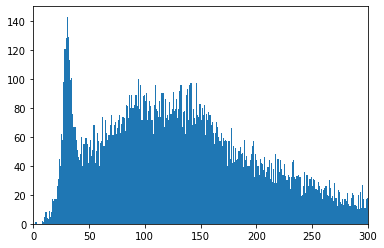

In [ ]:
plt.hist(mecab_data['length'], bins=4006)
plt.xlim(0,300)
plt.show()

In [ ]:
mecab_data['length'].describe([.90, .99])

count    16986.000000
mean       166.724714
std        144.044349
min          2.000000
50%        135.000000
90%        308.000000
99%        710.150000
max       4006.000000
Name: length, dtype: float64

In [1]:
# label 개수 확인 필요